In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from functools import partial
import qiskit as qk
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import state_fidelity
from qiskit.tools.visualization import circuit_drawer, plot_histogram

In [3]:
#qk.IBMQ.save_account('AUTHORIZATION TOKEN GOES HERE') #EXECUTE ONLY ONCE: The access token is stored in temp files inside 
ibmq_provider = qk.IBMQ.load_account()

C:\Users\jeany\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


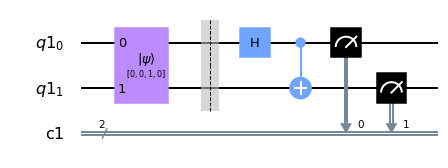

In [5]:
qr = qk.QuantumRegister(2)
cr = qk.ClassicalRegister(2)
qc = qk.QuantumCircuit(qr, cr)

init_vector = [0, 0, 1, 0] #Initialize to |10>
qc.initialize(init_vector, [qr[0], qr[1]]) #Initialize system state with init_vector
qc.barrier()

qc.h(0)
qc.cx(0,1)

qc.measure(range(2), range(2))

qc.draw('mpl')

Qiskit compiles all circuits to only CNOT and U3 (general rotations) gates. The above circuit is compiled into the following:

![title](circuit_diagrams/circuit-kfk2fxzz.svg)

This is the actual compiled OPENQASM code the machine executes:
~~~
OPENQASM 2.0;
include "qelib1.inc";

qreg q[5];

creg c7[3];


u3(1.9634954084936207, 0, 0) q[0];
u2(0, 0) q[1];
u2(0, 2.220446049250313e-16) q[2];
cx q[2], q[1];
u3(-1.1102230246251565e-16, 0, 0) q[1];
cx q[2], q[1];
cx q[1], q[0];
u3(1.1780972450961724, 0, 0) q[0];
cx q[1], q[2];
cx q[2], q[1];
cx q[1], q[2];
cx q[1], q[0];
cx q[0], q[1];
cx q[1], q[0];
cx q[0], q[1];
u3(-0.39269908169872414, 0, 0) q[1];
cx q[2], q[1];
u3(0.39269908169872414, 0, 0) q[1];
cx q[0], q[1];
barrier q[0], q[3], q[2], q[4], q[1];
measure q[1] -> c7[0];
measure q[2] -> c7[1];
measure q[0] -> c7[2];
~~~

## Simulated output (local):

{'01': 4153, '10': 4039}


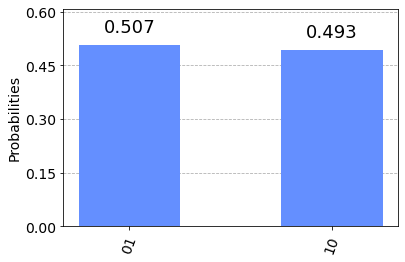

In [6]:
job = qk.execute(qc, backend=qk.Aer.get_backend('qasm_simulator'), shots=8192)
res = job.result()

counts = res.get_counts(qc)
print(counts)

fig = plt.figure()
plt.rcParams.update({'font.size': 18})
ax = fig.add_subplot(111)
plot_histogram(counts, ax=ax)

## Real QC execution:

ibmq_16_melbourne
{'00': 454, '01': 3812, '10': 3822, '11': 104}


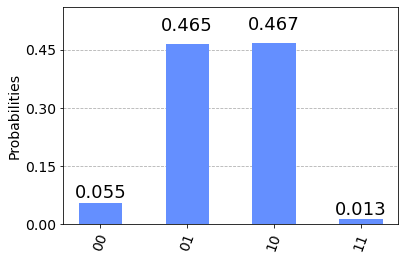

In [9]:
ibmq_backend = least_busy(ibmq_provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and not b.configuration().simulator and b.status().operational==True))
print(ibmq_backend)

job = qk.execute(qc, backend=ibmq_backend, shots=8192)
res = job.result()

counts = res.get_counts(qc)
print(counts)

fig = plt.figure()
plt.rcParams.update({'font.size': 18})
ax = fig.add_subplot(111)
plot_histogram(counts, ax=ax)